In [1]:
# Loading R packages
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(plotly)
library(wesanderson)


Attaching package: ‘plyr’

The following objects are masked from ‘package:reshape’:

    rename, round_any


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘plotly’

The following objects are masked from ‘package:plyr’:

    arrange, mutate, rename, summarise

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:reshape’:

    rename

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [2]:
ps = readRDS(file="CHTC/Dada2_Results_OA20_PEAR_Full/ps.fungi")
ps.norm = transform_sample_counts(ps, function(x) (x / sum(x)))
mdf = psmelt(ps.norm)

In [3]:
df = mdf%>%
    filter(Land_Class=="Upland")%>%
    group_by(Land_Class,Org_or_Min,Severity_Class,Sample,Class)%>%
    summarize(Abundance=sum(Abundance))%>%
    mutate(SoilSev = paste(Org_or_Min,Severity_Class))
df$SoilSev = ordered(df$SoilSev,c("O Unburned","O Low","O Moderate","O High","M Unburned","M Low","M Moderate","M High"))
head(df)

Land_Class,Org_or_Min,Severity_Class,Sample,Class,Abundance,SoilSev
Upland,M,Unburned,15S-NT-U07M,,0.113583860,M Unburned
Upland,M,Unburned,15S-NT-U07M,Agaricomycetes,0.031110427,M Unburned
Upland,M,Unburned,15S-NT-U07M,Agaricostilbomycetes,0.000000000,M Unburned
Upland,M,Unburned,15S-NT-U07M,Archaeorhizomycetes,0.000000000,M Unburned
Upland,M,Unburned,15S-NT-U07M,Cystobasidiomycetes,0.001270599,M Unburned
Upland,M,Unburned,15S-NT-U07M,Dacrymycetes,0.000000000,M Unburned


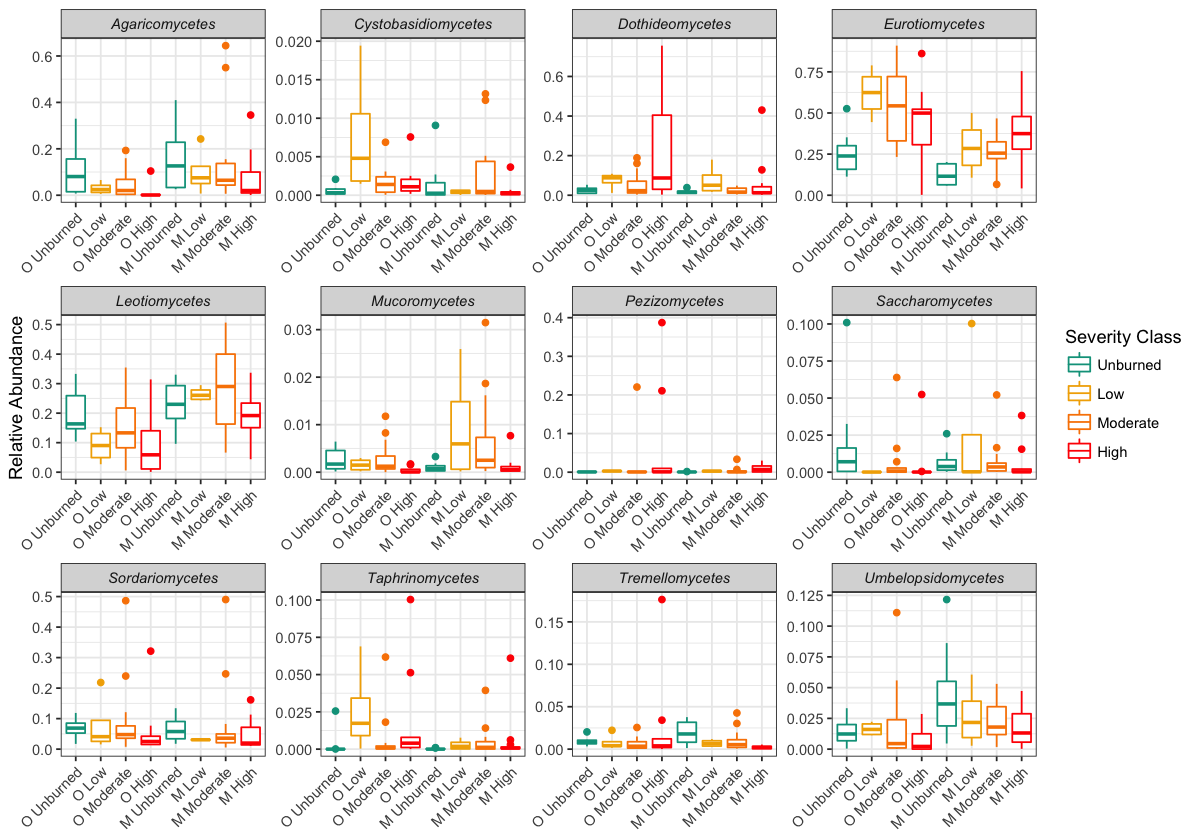

In [4]:
options(repr.plot.width=10, repr.plot.height=7)

#MajClass = levels(df$Class)
MajClass = c("Agaricomycetes","Cystobasidiomycetes","Dothideomycetes","Eurotiomycetes","Leotiomycetes",
          "Microboytryomycetes","Mucoromycetes","Pezizomycetes","Saccharomycetes","Sordariomycetes","Taphrinomycetes",
          "Tremellomycetes","Umbelopsidomycetes")

df = df %>%
    filter(Class %in% MajClass)

p = ggplot(data=df, aes(x=SoilSev,y=Abundance,color=Severity_Class))
p = p + geom_boxplot()
p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle=45,hjust=1), 
              strip.text.x = element_text(face="italic"),
             axis.title.x = element_blank())
palette = c(wes_palette("Darjeeling"),wes_palette("Darjeeling2")[2:4])
palette = palette[c(2,3,4,1,5,6)]
p = p + scale_color_manual(values=palette)
p = p + facet_wrap(~Class, scales="free",ncol=4) + expand_limits(y=0) + ylab("Relative Abundance")
p = p + guides(colour=guide_legend(title="Severity Class"))
p

In [5]:
df = mdf%>%
    filter(Land_Class=="Wetland")%>%
    group_by(Land_Class,Org_or_Min,Severity_Class,Sample,Class)%>%
    summarize(Abundance=sum(Abundance))%>%
    mutate(SoilSev = paste(Org_or_Min,Severity_Class))
df$SoilSev = ordered(df$SoilSev,c("O Unburned","O Low","O Moderate","O High","M Unburned","M Low","M Moderate","M High"))
head(df)

Land_Class,Org_or_Min,Severity_Class,Sample,Class,Abundance,SoilSev
Wetland,M,Low,15S-NT-21M,,0.0139640615,M Low
Wetland,M,Low,15S-NT-21M,Agaricomycetes,0.0006855741,M Low
Wetland,M,Low,15S-NT-21M,Agaricostilbomycetes,0.0000000000,M Low
Wetland,M,Low,15S-NT-21M,Archaeorhizomycetes,0.0000000000,M Low
Wetland,M,Low,15S-NT-21M,Cystobasidiomycetes,0.0011546511,M Low
Wetland,M,Low,15S-NT-21M,Dacrymycetes,0.0000000000,M Low


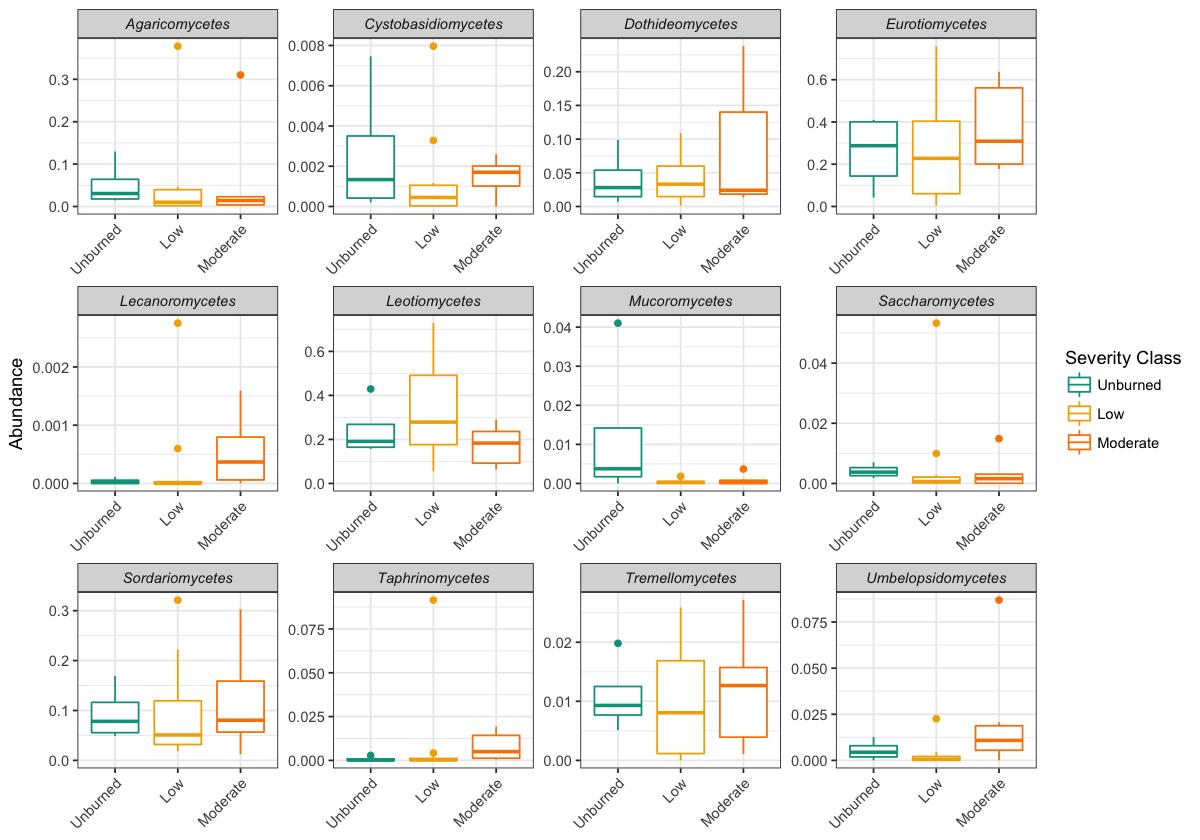

In [6]:
options(repr.plot.width=10, repr.plot.height=7)

#MajPhy = levels(df$Class)
MajPhy = c("Agaricomycetes","Cystobasidiomycetes","Dothideomycetes","Eurotiomycetes","Lecanoromycetes","Leotiomycetes",
          "Microboytryomycetes","Mucoromycetes","Saccharomycetes","Sordariomycetes",
           "Taphrinomycetes","Tremellomycetes","Umbelopsidomycetes")

df = df %>%
    filter(Class %in% MajPhy)%>%
    mutate(SeverityLand = paste(Severity_Class))

p = ggplot(data=df, aes(x=Severity_Class,y=Abundance,color=Severity_Class))
p = p + geom_boxplot()
p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle=45,hjust=1),
              strip.text.x = element_text(face="italic"),
             axis.title.x = element_blank())
palette = c(wes_palette("Darjeeling"),wes_palette("Darjeeling2")[2:4])
palette = palette[c(2,3,4,1,5,6)]
p = p + scale_color_manual(values=palette)
p = p + facet_wrap(~Class, scales="free",ncol=4) + expand_limits(y=0)
p = p + guides(colour=guide_legend(title="Severity Class"))
p